In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = np.loadtxt("placement_package.csv", delimiter = ",", skiprows = 1)
X = data[:,0]
y = data[:,1]
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [24]:
X

array([[6.89],
       [5.12],
       [7.82],
       [7.42],
       [6.94],
       [7.89],
       [6.73],
       [6.75],
       [6.09],
       [8.31],
       [5.32],
       [6.61],
       [8.94],
       [6.93],
       [7.73],
       [7.25],
       [6.84],
       [5.38],
       [6.94],
       [7.48],
       [7.28],
       [6.85],
       [6.14],
       [6.19],
       [6.53],
       [7.28],
       [8.31],
       [5.42],
       [5.94],
       [7.15],
       [7.36],
       [8.1 ],
       [6.96],
       [6.35],
       [7.34],
       [6.87],
       [5.99],
       [5.9 ],
       [8.62],
       [7.43],
       [9.38],
       [6.89],
       [5.95],
       [7.66],
       [5.09],
       [7.87],
       [6.07],
       [5.84],
       [8.63],
       [8.87],
       [9.58],
       [9.26],
       [8.37],
       [6.47],
       [6.86],
       [8.2 ],
       [5.84],
       [6.6 ],
       [6.92],
       [7.56],
       [5.61],
       [5.48],
       [6.34],
       [9.16],
       [7.36],
       [7.6 ],
       [5.

In [25]:
y

array([[3.26],
       [1.98],
       [3.25],
       [3.67],
       [3.57],
       [2.99],
       [2.6 ],
       [2.48],
       [2.31],
       [3.51],
       [1.86],
       [2.6 ],
       [3.65],
       [2.89],
       [3.42],
       [3.23],
       [2.35],
       [2.09],
       [2.98],
       [2.83],
       [3.16],
       [2.93],
       [2.3 ],
       [2.48],
       [2.71],
       [3.65],
       [3.42],
       [2.16],
       [2.24],
       [3.49],
       [3.26],
       [3.89],
       [3.08],
       [2.73],
       [3.42],
       [2.87],
       [2.84],
       [2.43],
       [4.36],
       [3.33],
       [4.02],
       [2.7 ],
       [2.54],
       [2.76],
       [1.86],
       [3.58],
       [2.26],
       [3.26],
       [4.09],
       [4.62],
       [4.43],
       [3.79],
       [4.11],
       [2.61],
       [3.09],
       [3.39],
       [2.74],
       [1.94],
       [3.09],
       [3.31],
       [2.19],
       [1.61],
       [2.09],
       [4.25],
       [2.92],
       [3.81],
       [1.

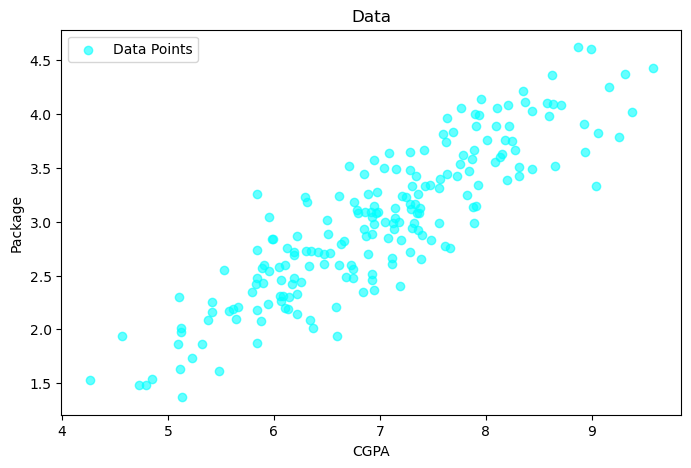

In [26]:
plt.figure(figsize = (8, 5))
plt.scatter(X, y, color = "cyan", alpha = 0.6, label = "Data Points")
plt.title("Data")
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.legend()
plt.show()

In [27]:
def predict(X, theta):

    # Compute predictions 'y_hat'
    return np.dot(X, theta)

In [28]:
def compute_cost(X, y, theta):
    
    # Compute the Mean Squared Error Cost
    m = len(y)
    y_hat=predict(X, theta)
    cost = (1 / (2 * m)) * np.sum(np.square(y_hat-y))

    return cost

In [29]:
def GD(X, y, theta, learning_rate = 0.01, itr = 1000):
    # Gradient Descent
    m = len(y)
    cost_history = []

    for i in range(itr):
        gradients = (1 / m) * X.T.dot(predict(X, theta) - y)
        theta = theta - learning_rate * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [30]:
# Add a bias column (ones) to X

X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [58]:
# Initialize random parameters (theta_0 = bias, theta_1 = slope)

theta_init = np.random.randn(2, 1)

In [59]:
#Training the model

theta_final,cost_history=GD(X_b,y,theta_init,learning_rate=0.015,itr=50)
print("Final Parameters : ")
print(theta_final)

Final Parameters : 
[[-0.625917 ]
 [ 0.5192757]]


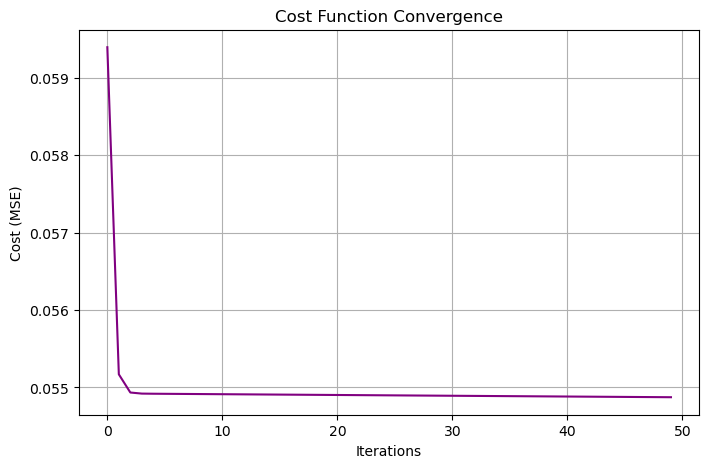

In [60]:
plt.figure(figsize=(8,5))
plt.plot(range(len(cost_history)),cost_history,color="purple")
plt.title("Cost Function Convergence")
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

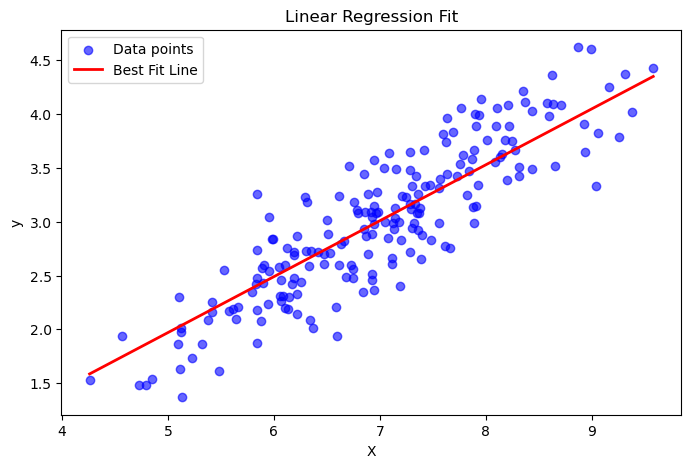

In [61]:
# Plotting the final regression line
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", alpha=0.6, label="Data points")

# Sort X for proper line plotting
sorted_indices = X.flatten().argsort()
X_sorted = X[sorted_indices]
X_sorted_b = X_b[sorted_indices]
y_pred_sorted = predict(X_sorted_b, theta_final)

# Plot best-fit line once
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Best Fit Line")

plt.title("Linear Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [62]:
# Example: Predict for new Data Points

X_new=np.array([[0],[2]]) # Replace your own data
X_new_b=np.c_[np.ones((X_new.shape[0], 1)), X_new]
y_pred = predict(X_new_b, theta_final)

print("Predicted values for new X:")
print(y_pred)

Predicted values for new X:
[[-0.625917  ]
 [ 0.41263439]]


In [63]:
intercept = theta_final[0][0]
slope = theta_final[1][0]

In [64]:
from sklearn.metrics import r2_score

y_pred = intercept + slope * X
r2 = r2_score(y, y_pred)
print("R² Score:", r2)


R² Score: 0.769431370486918


In [65]:
intercept

np.float64(-0.6259170011439177)

In [66]:
slope

np.float64(0.5192756951103437)

In [67]:
print(theta_final)

[[-0.625917 ]
 [ 0.5192757]]
